<a href="https://colab.research.google.com/github/NgaAdrain/TEAM_Enter_Text_Here/blob/master/Data_Varification/20200729_Deep_Learning_Model_With_DNN_AND_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1>**Deep Learning With CNN**</h1>

##**Module Import**


In [1]:
# Import the TensorFlow
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

##**File Read**

###<h2>학습용 데이터는 Google Drive에 train_input.csv의 형식으로 저장한다.</h2>

In [2]:
#train_file = pd.read_csv('/content/drive/My Drive/train_input.csv',encoding='utf-8')
#train_file = pd.read_csv('/content/drive/My Drive/train_input_1.csv',encoding='utf-8')
#train_file = pd.read_csv('/content/drive/My Drive/train_input_external_city.csv',encoding='utf-8')
#train_file = pd.read_csv('/content/drive/My Drive/train_input_nostop_norm_cut.csv',encoding='utf-8')
train_file = pd.read_csv('/content/drive/My Drive/train_input_nostop.csv',encoding='utf-8')
train_file_label = train_file.pop('Label')
#train_file.drop(['Timestamp','Winker(left)','Winker(right)','Timecheck'],axis = 'columns',inplace = True)
train_file.drop(['Timestamp','accel_Z','Winker(left)','Winker(right)','Timecheck'],axis = 'columns',inplace = True)
#print(train_file.values)
#if file broken -> sep='  ' 추가

###<h2>시뮬레이션 테스트 데이터는 test_input.csv의 형식으로 저장한다.</h2>

In [3]:
#test_file = pd.read_csv('/content/drive/My Drive/test_input.csv',encoding='utf-8')
#test_file = pd.read_csv('/content/drive/My Drive/test_input_1.csv',encoding='utf-8')
#test_file = pd.read_csv('/content/drive/My Drive/test_input_1_internal.csv',encoding='utf-8')
#test_file = pd.read_csv('/content/drive/My Drive/test_input_2_external.csv',encoding='utf-8')
test_file = pd.read_csv('/content/drive/My Drive/test_input_1_nostop.csv',encoding='utf-8')
test_file_time = test_file.pop('Timestamp')
test_file_label = test_file.pop('Label')
test_file.drop(['accel_Z','Winker(left)','Winker(right)','Timecheck'],axis = 'columns',inplace = True)

###<h2>실제 데이터는 real_data.csv의 형식으로 저장한다.</h2>

In [4]:
real_file = pd.read_csv('/content/drive/My Drive/real_data_nostop.csv',encoding='utf-8')
#real_file = pd.read_csv('/content/drive/My Drive/real_data.csv',encoding='utf-8')
real_file_label = real_file.pop('Label')
real_file.drop('accel_Z',axis = 'columns',inplace = True)

##**DataFrame 2 Numpy Array**


###<h2>학습용 데이터 변환</h2>

In [5]:
train_array = np.delete(train_file.values,-1,0)
train_label = np.delete(train_file_label.values,-1,0)

###<h2>테스트 데이터 변환</h2>

In [6]:
test_array = np.delete(test_file.values,-1,0)
test_label = np.delete(test_file_label.values,-1,0)
test_time = np.delete(test_file_time.values,-1,0)

###<h2>실제 데이터 변환</h2>

In [7]:
real_array = np.delete(real_file.values,-1,0)
real_label = np.delete(real_file_label.values,-1,0)

###<h2>30Hz->10Hz로 데이터 갯수 맞추기</h2>

형진이가 만든 10hz변환기를 통과한 학습용 파일에는 필요가 없다!

####<h3>학습용 데이터</h3>

In [8]:
train_10hz_array = []
train_10hz_label = []
count = 0
for temp in train_array:
  if(count%3 == 1):
    train_10hz_array.append(train_array[count,:])
    train_10hz_label.append(train_label[count])
  count = count + 1
count = 0
for temp in train_array:
  if(count%3 == 0):
    train_10hz_array.append(train_array[count,:])
    train_10hz_label.append(train_label[count])
  count = count + 1
count = 0
for temp in train_array:
  if(count%3 == 2):
    train_10hz_array.append(train_array[count,:])
    train_10hz_label.append(train_label[count])
  count = count + 1
train_array = np.array(train_10hz_array)
train_label = np.array(train_10hz_label)
print(len(train_array))
print(len(train_label))

206007
206007


####<h3>테스트 데이터</h3>

In [9]:
test_10hz_array = []
test_10hz_label = []
count = 0
for temp in test_array:
  if(count%3 == 1):
    test_10hz_array.append(test_array[count,:])
    test_10hz_label.append(test_label[count])
  count = count + 1
count = 0
for temp in test_array:
  if(count%3 == 0):
    test_10hz_array.append(test_array[count,:])
    test_10hz_label.append(test_label[count])
  count = count + 1
count = 0
for temp in test_array:
  if(count%3 == 2):
    test_10hz_array.append(test_array[count,:])
    test_10hz_label.append(test_label[count])
  count = count + 1
test_array = np.array(test_10hz_array)
test_label = np.array(test_10hz_label)
print(test_array)
print(len(test_label))

[[ 7.10000e+01  3.91260e-02 -1.00000e+00  0.00000e+00  0.00000e+00]
 [ 7.10000e+01  1.09055e-01  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 7.00000e+01  1.10460e-01  1.00000e+00  0.00000e+00  0.00000e+00]
 ...
 [ 0.00000e+00  6.00000e-05  1.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  2.50000e-05  1.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  3.00000e-05  1.00000e+00  0.00000e+00  0.00000e+00]]
18172


###<h2>데이터 길이</h2>

In [10]:
length_test = int(len(test_array)/25)
length_train = int(len(train_array)/25)

##**데이터 정규화**

###<h2>사용 상수</h2>

In [11]:
VELOCITY = 0
ACCEL_X = 1
STEERING = 2 
ACCEL = 3
BRAKE = 4
NOR_MAX = 31.75
NOR_MIN = -32
VELOCITY_MAX = 100
VELOCITY_MIN = 0
ACCEL_X_MAX = 0.6
ACCEL_X_MIN = -0.6
STEERING_MAX = 225
STEERING_MIN = -225
ACCEL_MAX = 70
ACCEL_MIN = 0
BRAKE_MAX = 50
BRAKE_MIN = 0

###<h2>학습용 데이터 정규화</h2>

- <h3>실제 데이터의 정규화내용</h3>
1. steering wheel  -> 31.75(270,-270) ~ -32
2. brake -> 31.75(50,0) ~ -32
3. speed(velocity) -> 31.75(100,0) ~ -32
4. accel -> 31.75(70,0) ~ -32
5. accelaration_longitudinal(X) -> 31.75(0.6,-0.6) ~ -32
6. accelaration_lateral(Z) -> 31.75(0.6,-0.6) ~ -32

In [12]:
print("Process 1-1 Velocity[",end="")
for i in range(len(train_array)):
  train_array[i][VELOCITY] = round(train_array[i][VELOCITY],0)
  if(i%length_train==0):
    print("#",end="")
  if(train_array[i][VELOCITY]>=VELOCITY_MAX):    #MAX
    train_array[i][VELOCITY] = NOR_MAX
  elif(train_array[i][VELOCITY]>=(VELOCITY_MAX/2)):   #MID
    train_array[i][VELOCITY] = round(((train_array[i][VELOCITY] - (VELOCITY_MAX/2))/(VELOCITY_MAX/2)*NOR_MAX),2)
  elif(train_array[i][VELOCITY]>VELOCITY_MIN):     #MIN
    train_array[i][VELOCITY] = round(((train_array[i][VELOCITY] - (VELOCITY_MAX/2))/(VELOCITY_MAX/2)*(-1*NOR_MIN)),2)
  else:
    train_array[i][VELOCITY] = NOR_MIN
print("]\nProcess 1-2 Accel_X [",end="")
for i in range(len(train_array)):
  if(i%length_train==0):
    print("#",end="")  
  if(train_array[i][ACCEL_X]>=ACCEL_X_MAX):     #MAX
    train_array[i][ACCEL_X] = NOR_MAX
  elif(train_array[i][ACCEL_X]>= 0):    #MID
    train_array[i][ACCEL_X] = round(((train_array[i][ACCEL_X])/ACCEL_X_MAX*NOR_MAX),2)
  elif(train_array[i][ACCEL_X]> ACCEL_X_MIN):  #MIN
    train_array[i][ACCEL_X] = round(((train_array[i][ACCEL_X])/ACCEL_X_MAX*(-1*NOR_MIN)),2)
  else:
    train_array[i][ACCEL_X] = NOR_MIN
"""
print("]\nProcess 1-3 Accel_Z [",end="")
for i in range(len(train_array)):
  if(i%length_test==0):
    print("#",end="")
  if(train_file.values[i][ACCEL_Z]>=1):       #MAX
    train_array[i][ACCEL_Z] = 31.75
  elif(train_file.values[i][ACCEL_Z]>= 0):    #MID
    train_array[i][ACCEL_Z] = round(((train_array[i][ACCEL_Z])*31.75),2)
  elif(train_file.values[i][ACCEL_Z]>-1):     #MIN
    train_array[i][ACCEL_Z] = round(((train_array[i][ACCEL_Z])*32),2)
  else:
    train_array[i][ACCEL_Z] = -32
"""
print("]\nProcess 1-3 Steering[",end="")
for i in range(len(train_array)):
  if(i%length_train==0):
    print("#",end="")  
  if(train_array[i][STEERING]>=STEERING_MAX):    #MAX
    train_array[i][STEERING] = NOR_MAX
  elif(train_array[i][STEERING]>= 0):   #MID
    train_array[i][STEERING] = round(((train_array[i][STEERING])/STEERING_MAX*NOR_MAX),2)
  elif(train_array[i][STEERING]> STEERING_MIN): #MIN
    train_array[i][STEERING] = round(((train_array[i][STEERING])/STEERING_MAX*(-1*NOR_MIN)),2)
  else:
    train_array[i][STEERING] = NOR_MIN
print("]\nProcess 1-4 Accelpad[",end="")
for i in range(len(train_array)):
  if(i%length_train==0):
    print("#",end="")  
  if(train_array[i][ACCEL]>=ACCEL_MAX):        #MAX
    train_array[i][ACCEL] = NOR_MAX
  elif(train_array[i][ACCEL]>= (ACCEL_MAX/2)):     #MID
    train_array[i][ACCEL] = round(((train_array[i][ACCEL] - (ACCEL_MAX/2))/(ACCEL_MAX/2)*NOR_MAX),2)
  elif(train_array[i][ACCEL]> ACCEL_MIN):       #MIN
    train_array[i][ACCEL] = round(((train_array[i][ACCEL] - (ACCEL_MAX/2))/(ACCEL_MAX/2)*(-1*NOR_MIN)),2)
  else:
    train_array[i][ACCEL] = NOR_MIN
print("]\nProcess 1-5 Brakepad[",end="")
for i in range(len(train_array)):
  if(i%length_train==0):
    print("#",end="")
  if(train_array[i][BRAKE]>=BRAKE_MAX):        #MAX
    train_array[i][BRAKE] = NOR_MAX
  elif(train_array[i][BRAKE]>= (BRAKE_MAX/2)):     #MID
    train_array[i][BRAKE] = round(((train_array[i][BRAKE] - (BRAKE_MAX/2))/(BRAKE_MAX/2)*NOR_MAX),2)
  elif(train_array[i][BRAKE]> BRAKE_MIN):       #MIN
    train_array[i][BRAKE] = round(((train_array[i][BRAKE] - (BRAKE_MAX/2))/(BRAKE_MAX/2)*(-1*NOR_MIN)),2)
  else:
    train_array[i][BRAKE] = NOR_MIN
print("]\nProcess 1 Clear")

Process 1-1 Velocity[##########################]
Process 1-2 Accel_X [##########################]
Process 1-3 Steering[##########################]
Process 1-4 Accelpad[##########################]
Process 1-5 Brakepad[##########################]
Process 1 Clear


###<h2>테스트 데이터 정규화</h2>

- <h3>시뮬레이터 값의 범위</h3>
1. Velocity : 0 ~ 240 -> 31.75(100,0) ~ -32
2. Acceleration.<br>
Z -> 속도가 감소하면 양수, 속도가 증가하면 음수 -> 31.75(1,-1) ~ -32<br>
X -> 차가 왼쪽으로 이동하면 감소 오른쪽으로 이동하면 증가 -> 31.75(0.6,-0.6) ~ -32
3. Steering_wheel : -1 ~ 1 => -450 ~ 450(degree) -> 31.75(270,-270) ~ -32
4. Brake : 0 ~ 1 => 0 ~ 100% -> 31.75(60,0) ~ -32
5. Accel : 0 ~ 1 => 0 ~ 100% -> 31.75(80,0) ~ -32<br>

In [13]:
print("Process 2-1 Velocity[",end="")
for i in range(len(test_array)):
  test_array[i][VELOCITY] = round(test_array[i][VELOCITY],0)
  if(i%length_test==0):
    print("#",end="")
  if(test_array[i][VELOCITY]>=VELOCITY_MAX):   #MAX
    test_array[i][VELOCITY] = NOR_MAX
  elif(test_array[i][VELOCITY]>=(VELOCITY_MAX/2)):  #MID
    test_array[i][VELOCITY] = round(((test_array[i][VELOCITY] - (VELOCITY_MAX/2))/(VELOCITY_MAX/2)*NOR_MAX),2)
  elif(test_array[i][VELOCITY]>VELOCITY_MIN):    #MIN
    test_array[i][VELOCITY] = round(((test_array[i][VELOCITY] - (VELOCITY_MAX/2))/(VELOCITY_MAX/2)*(-1*NOR_MIN)),2)
  else:                                     
    test_array[i][VELOCITY] = NOR_MIN
print("]\nProcess 2-2 Accel_X [",end="")
for i in range(len(test_array)):
  if(i%length_test==0):
    print("#",end="")  
  if(test_array[i][ACCEL_X]>=ACCEL_X_MAX):    #MAX
    test_array[i][ACCEL_X] = NOR_MAX
  elif(test_array[i][ACCEL_X]>= 0):   #MID
    test_array[i][ACCEL_X] = round(((test_array[i][ACCEL_X])/ACCEL_X_MAX*NOR_MAX),2)
  elif(test_array[i][ACCEL_X]> ACCEL_X_MIN): #MIN
    test_array[i][ACCEL_X] = round(((test_array[i][ACCEL_X])/ACCEL_X_MAX*(-1*NOR_MIN)),2)
  else:                                     
    test_array[i][ACCEL_X] = NOR_MIN
"""
print("]\nProcess 2-3 Accel_Z [",end="")
for i in range(len(test_array)):
  if(i%length_test==0):
    print("#",end="")
  if(test_file.values[i][ACCEL_Z]>=1):      #MAX
    test_array[i][ACCEL_Z] = 31.75
  elif(test_file.values[i][ACCEL_Z]>= 0):   #MID
    test_array[i][ACCEL_Z] = round(((test_array[i][ACCEL_Z])*31.75),2)
  elif(test_file.values[i][ACCEL_Z]>-1):    #MIN
    test_array[i][ACCEL_Z] = round(((test_array[i][ACCEL_Z])*32),2)
  else:                                     
    test_array[i][ACCEL_Z] = -32
"""
print("]\nProcess 2-3 Steering[",end="")
for i in range(len(test_array)):
  if(i%length_test==0):
    print("#",end="")  
  if(test_array[i][STEERING]>=STEERING_MAX):   #MAX
    test_array[i][STEERING] = NOR_MAX
  elif(test_array[i][STEERING]>= 0):  #MID
    test_array[i][STEERING] = round(((test_array[i][STEERING])/STEERING_MAX*NOR_MAX),2)
  elif(test_array[i][STEERING]>STEERING_MIN): #MIN
    test_array[i][STEERING] = round(((test_array[i][STEERING])/STEERING_MAX*(-1*NOR_MIN)),2)
  else:                                     
    test_array[i][STEERING] = NOR_MIN
print("]\nProcess 2-4 Accelpad[",end="")
for i in range(len(test_array)):
  if(i%length_test==0):
    print("#",end="")  
  if(test_array[i][ACCEL]>=ACCEL_MAX):       #MAX
    test_array[i][ACCEL] = NOR_MAX
  elif(test_array[i][ACCEL]>= (ACCEL_MAX/2)):    #MID
    test_array[i][ACCEL] = round(((test_array[i][ACCEL] - (ACCEL_MAX/2))/(ACCEL_MAX/2)*NOR_MAX),2)
  elif(test_array[i][ACCEL]> ACCEL_MIN):      #MIN
    test_array[i][ACCEL] = round(((test_array[i][ACCEL] - (ACCEL_MAX/2))/(ACCEL_MAX/2)*(-1*NOR_MIN)),2)
  else:                                     
    test_array[i][ACCEL] = NOR_MIN
print("]\nProcess 2-5 Brakepad[",end="")
for i in range(len(test_array)):
  if(i%length_test==0):
    print("#",end="")
  if(test_array[i][BRAKE]>=BRAKE_MAX):       #MAX
    test_array[i][BRAKE] = NOR_MAX
  elif(test_array[i][BRAKE]>= (BRAKE_MAX/2)):    #MID
    test_array[i][BRAKE] = round(((test_array[i][BRAKE] - (BRAKE_MAX/2))/(BRAKE_MAX/2)*NOR_MAX),2)
  elif(test_array[i][BRAKE]> BRAKE_MIN):      #MIN
    test_array[i][BRAKE] = round(((test_array[i][BRAKE] - (BRAKE_MAX/2))/(BRAKE_MAX/2)*(-1*NOR_MIN)),2)
  else:                                     
    test_array[i][BRAKE] = NOR_MIN
print("]\nProcess 2 Clear")

Process 2-1 Velocity[##########################]
Process 2-2 Accel_X [##########################]
Process 2-3 Steering[##########################]
Process 2-4 Accelpad[##########################]
Process 2-5 Brakepad[##########################]
Process 2 Clear


##**데이터셋 만들기**

###<h1>사용 상수</h1>

In [14]:
#초당 32개의 데이터가 나옴.(30~32Hz)(window)// 120개(4초 분량)
WINDOW_SIZE = 48 #초당 10개의 데이터로 변환 -> 10Hz -> 5초 분량

###<h2>Deep Neural Network Dataset</h2>

####<h2>학습용 데이터셋</h2>

In [15]:
#30hz
train_dataset_data = []
train_dataset_label = []
for i in range(WINDOW_SIZE, train_array.shape[0] + 1, 1):
  train_dataset_data.append(train_array[i-WINDOW_SIZE:i])
  train_dataset_label.append(train_label[i-1])
tr_data = np.array(train_dataset_data)
tr_label = np.array(train_dataset_label) 

print(tr_data.shape)
print(tr_label.shape)

(205960, 48, 5)
(205960,)


####<h2>테스트 데이터셋</h2>

In [16]:
#30hz
test_dataset_data = []
test_dataset_label = []
for i in range(WINDOW_SIZE, test_array.shape[0] + 1, 1):
  test_dataset_data.append(test_array[i-WINDOW_SIZE:i])
  test_dataset_label.append(test_label[i-1])

te_data = np.array(test_dataset_data)
te_label = np.array(test_dataset_label) 
print(te_data.shape)

(18125, 48, 5)


####<h2>실제 데이터셋</h2>

In [17]:
real_dataset_data = []
real_dataset_label = []
for i in range(WINDOW_SIZE, real_array.shape[0] + 1, 1):
  real_dataset_data.append(real_array[i-WINDOW_SIZE:i])
  real_dataset_label.append(real_label[i-1])
re_data = np.array(real_dataset_data)
re_label = np.array(real_dataset_label) 
print(re_data.shape)

(53214, 48, 5)


###<h2>Convolution Neural Network Dataset</h2>

위의 np.array에 차원을 추가

In [18]:
##여기 구현
##TO DO: data의 구조를 (None,총 row수, WINDOW크기, 라벨수)로 바꿔야함. 4차원으로 변경
tr_c_data = tr_data.reshape(-1,WINDOW_SIZE,5,1)
te_c_data = te_data.reshape(-1,WINDOW_SIZE,5,1)
re_c_data = re_data.reshape(-1,WINDOW_SIZE,5,1)
print(tr_c_data.shape)

(205960, 48, 5, 1)


##**상태 분석 모델링**

###<h2>Deep Neural Network Model</h2>

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 240)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               30848     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 119       
Total params: 49,607
Trainable params: 49,607
Non-trainable params: 0
__________________________________________________

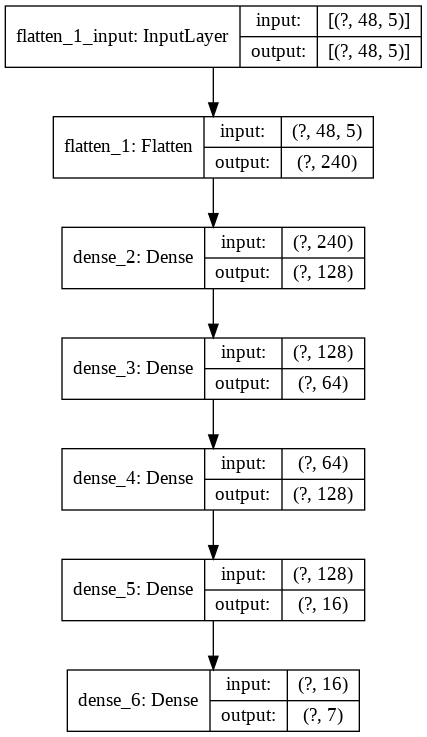

In [31]:
dnn_model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(WINDOW_SIZE, 6)),
    keras.layers.Flatten(input_shape=(WINDOW_SIZE, 5)),
    #keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(64),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(128),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(16),
    #keras.layers.Dense(16),
    #keras.layers.Dense(8, activation='softmax')
    keras.layers.Dense(7, activation='softmax')
])
dnn_model.summary()
dnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tf.keras.utils.plot_model(dnn_model, show_shapes=True)

####<h3>10Hz용 모델</h3>

In [ ]:
dnn_10hz_model = keras.Sequential([
    #keras.layers.Flatten(input_shape=(WINDOW_SIZE, 6)),
    keras.layers.Flatten(input_shape=(WINDOW_10HZ_SIZE, 5)),
    #keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(64),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(128),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(16),
    #keras.layers.Dense(16),
    keras.layers.Dense(8, activation='softmax')
])
dnn_10hz_model.summary()
dnn_10hz_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32128     
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_13 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
Total params: 50,904
Trainable params: 50,904
Non-trainable params: 0
__________________________________________________

###<h2>Convolution Neural Network Model</h2>

Convolution neural Network에서 합성곱 신경망의 필터를 통과할 때(Conv2D-> 2차원 필터) 데이터는 차원이 낮아지게 된다.<br>
NxN의 vector가 FxF의 필터를 통과하게되면 (N-F+1)x(N-F+1)로 줄어들게 된다.<br>
즉 지금 여기의 예시에서는 120(윈도우 크기) x 5를 3x3이 통과하게 되면 118 x 3으로 줄어든다.<br>
이를 MaxPool2D의 2x2필터를 통과하게 되면 117x2로 줄어들게 되며 다시한번 Conv2D의 2x2 필터를 통과하게 되면 116x1로 줄어들어서 더이상 Convolution필터를 통과할 수 없게 된다.<br>
이 때문에 많은 필터 layer를 추가하지 못하므로 이를 해결하기위해 padding 기술을 사용한다.<br>
padding기술은 각 edge의 값을 복사하여 각 방향으로 한 칸 늘려서 크기를 유지하는 기술이다.<br>
Conv2D에서는 padding을 사용하지 않는 valid, padding을 사용하는 same의 두가지를 지원한다. 이를 사용하면 많은 layer를 넣을 수 있다. 이를 이용하여 해결하였다.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 5, 64)         640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 3, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 3, 128)        73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 2, 128)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 2, 64)         73792     
_________________________________________________________________
flatten (Flatten)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                9

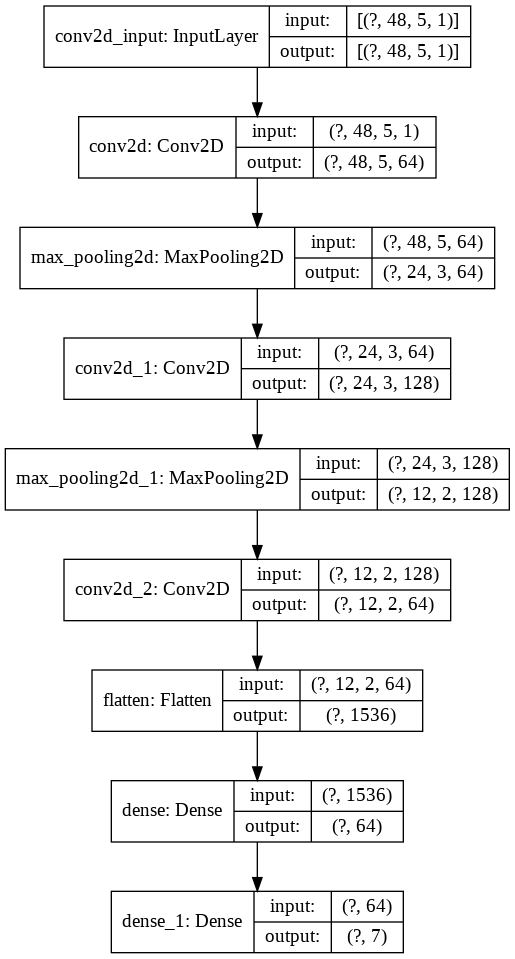

In [19]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(64,(3,3),activation='relu',padding='same',input_shape = (WINDOW_SIZE,5,1)),#120개(WINDOW_SIZE의 3x3 필터) #??????????????????? => 왜 INPUT SHAPE가 120X18X1로 들어가지???????
    #keras.layers.Conv2D(120,(3,3),activation='relu', input_shape = (WINDOW_SIZE,5,1))
    keras.layers.MaxPool2D((2,2),padding='same'), #2x2 size의 Max Pooling 2D Matrix
    #keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'), # 전 단계 필터 수의 2배인 240개의 3x3 matrix filters
    keras.layers.MaxPool2D((2,2),padding='same'), #2x2 size의 Max Pooling 2D Matrix
    keras.layers.Conv2D(64,(3,3),padding='same'), # 전 단계 필터 수의 1/2배인 120개의 3x3 matrix filters
    #keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    #keras.layers.Dense(8, activation='softmax')   #stop 넣는 경우
    keras.layers.Dense(7, activation='softmax')  #stop 빼는 경우
])
cnn_model.summary()
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tf.keras.utils.plot_model(cnn_model, show_shapes=True)

###<h2>Depthwise Separable Convolution Neural Network Model</h2>

##**모델 학습**

###DNN MODEL 학습

In [32]:
dnn_model.fit(tr_data,tr_label,epochs=30,batch_size=32)

Epoch 1/30
6437/6437 [==============================] - 14s 2ms/step - loss: 0.5949 - accuracy: 0.8324
Epoch 2/30
6437/6437 [==============================] - 15s 2ms/step - loss: 0.3893 - accuracy: 0.8766
Epoch 3/30
6437/6437 [==============================] - 15s 2ms/step - loss: 0.3378 - accuracy: 0.8920
Epoch 4/30
6437/6437 [==============================] - 14s 2ms/step - loss: 0.3091 - accuracy: 0.9004
Epoch 5/30
6437/6437 [==============================] - 14s 2ms/step - loss: 0.2889 - accuracy: 0.9059
Epoch 6/30
6437/6437 [==============================] - 14s 2ms/step - loss: 0.2737 - accuracy: 0.9099
Epoch 7/30
6437/6437 [==============================] - 14s 2ms/step - loss: 0.2653 - accuracy: 0.9134
Epoch 8/30
6437/6437 [==============================] - 14s 2ms/step - loss: 0.2515 - accuracy: 0.9171
Epoch 9/30
6437/6437 [==============================] - 14s 2ms/step - loss: 0.2418 - accuracy: 0.9198
Epoch 10/30
6437/6437 [==============================] - 14s 2ms/step - l

###CNN MODEL 학습

In [23]:
cnn_model.fit(tr_c_data,tr_label,epochs=30,batch_size=32)

Epoch 1/30
6437/6437 [==============================] - 19s 3ms/step - loss: 0.3726 - accuracy: 0.8768
Epoch 2/30
6437/6437 [==============================] - 19s 3ms/step - loss: 0.2012 - accuracy: 0.9315
Epoch 3/30
6437/6437 [==============================] - 20s 3ms/step - loss: 0.1511 - accuracy: 0.9490
Epoch 4/30
6437/6437 [==============================] - 20s 3ms/step - loss: 0.1279 - accuracy: 0.9576
Epoch 5/30
6437/6437 [==============================] - 20s 3ms/step - loss: 0.1160 - accuracy: 0.9625
Epoch 6/30
6437/6437 [==============================] - 19s 3ms/step - loss: 0.1025 - accuracy: 0.9673
Epoch 7/30
6437/6437 [==============================] - 19s 3ms/step - loss: 0.0962 - accuracy: 0.9701
Epoch 8/30
6437/6437 [==============================] - 19s 3ms/step - loss: 0.0918 - accuracy: 0.9715
Epoch 9/30
6437/6437 [==============================] - 19s 3ms/step - loss: 0.0904 - accuracy: 0.9724
Epoch 10/30
6437/6437 [==============================] - 19s 3ms/step - l

##**모델 평가**

###<h2>Deep Neural Network Model</h2>

####테스트 데이터 평가

In [42]:
dnn_model.evaluate(te_data, te_label,verbose=2)

567/567 - 1s - loss: 1.5240 - accuracy: 0.7897


[1.52397882938385, 0.7897379398345947]

####실제 데이터 평가

In [43]:
dnn_model.evaluate(re_data, re_label,verbose=2)

1663/1663 - 3s - loss: 1.5217 - accuracy: 0.8050


[1.521713376045227, 0.80503249168396]

###<h2>Convolution Neural Network Model</h2>

####테스트 데이터 평가

In [24]:
cnn_model.evaluate(te_c_data, te_label,verbose=2)

567/567 - 1s - loss: 4.4127 - accuracy: 0.7525


[4.412679672241211, 0.7524965405464172]

####실제 데이터 평가

In [25]:
cnn_model.evaluate(re_c_data, re_label,verbose=2)

1663/1663 - 3s - loss: 4.9332 - accuracy: 0.7692


[4.93320894241333, 0.7692336440086365]

##<h2>**모델 예측**</h2>

###DNN 예측

In [33]:
dnn_test_predictions = dnn_model.predict(te_data)
dnn_real_predictions = dnn_model.predict(re_data)

In [34]:
dnn_test_pred = []
for cnt in range(len(dnn_test_predictions)):
  dnn_test_pred.append(np.argmax(dnn_test_predictions[cnt]))
print(dnn_test_pred)

[2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 4, 5, 5, 5, 0, 1, 1, 1, 5, 5, 5, 5, 0, 0, 0, 5, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 4, 6, 6, 6, 6, 6, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 6, 

In [35]:
dnn_test_pred_count=[0,0,0,0,0,0,0]
for x in dnn_test_pred:
  dnn_test_pred_count[x] = dnn_test_pred_count[x] + 1
print(dnn_test_pred_count)

[10887, 1757, 1730, 648, 1740, 628, 735]


In [36]:
dnn_real_pred = []
for cnt in range(len(dnn_real_predictions)):
  dnn_real_pred.append(np.argmax(dnn_real_predictions[cnt]))
print(dnn_real_pred)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [37]:
dnn_real_pred_count=[0,0,0,0,0,0,0]
for x in dnn_real_pred:
  dnn_real_pred_count[x] = dnn_real_pred_count[x] + 1
print(dnn_real_pred_count)

[44866, 2039, 1195, 1078, 1904, 1153, 979]


###CNN 예측

In [26]:
cnn_test_predictions = cnn_model.predict(te_c_data)
cnn_real_predictions = cnn_model.predict(re_c_data)

In [27]:
cnn_test_pred = []
for cnt in range(len(cnn_test_predictions)):
  cnn_test_pred.append(np.argmax(cnn_test_predictions[cnt]))
print(cnn_test_pred)

[2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 5, 5, 5, 5, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 4, 0, 6, 0, 0, 3, 6, 0, 6, 0, 1, 0, 0, 0, 0, 0, 3, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [28]:
cnn_test_pred_count=[0,0,0,0,0,0,0]
for x in cnn_test_pred:
  cnn_test_pred_count[x] = cnn_test_pred_count[x] + 1
print(cnn_test_pred_count)

[11188, 1461, 2144, 709, 1808, 463, 352]


In [29]:
cnn_real_pred = []
for cnt in range(len(cnn_real_predictions)):
  cnn_real_pred.append(np.argmax(cnn_real_predictions[cnt]))
print(cnn_real_pred)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [30]:
cnn_real_pred_count=[0,0,0,0,0,0,0]
for x in cnn_real_pred:
  cnn_real_pred_count[x] = cnn_real_pred_count[x] + 1
print(cnn_real_pred_count)

[43866, 1404, 1112, 3920, 2229, 65, 618]


###실제 라벨 개수

In [20]:
real_label_count=[0,0,0,0,0,0,0]
for x in real_label:
  real_label_count[x] = real_label_count[x] + 1
print(real_label_count)

[40067, 4243, 3109, 1520, 1583, 1571, 1168]


In [21]:
test_label_count=[0,0,0,0,0,0,0]
for x in test_label:
  test_label_count[x] = test_label_count[x] + 1
print(test_label_count)

[11082, 2011, 2195, 651, 1259, 528, 446]


In [22]:
train_label_count=[0,0,0,0,0,0,0]
for x in train_label:
  train_label_count[x] = train_label_count[x] + 1
print(train_label_count)

[117072, 19034, 18863, 17782, 17774, 8424, 7058]


###예측 결과 파일로 출력

In [ ]:
txt = 'Pred_Direction,Real_Direction\n'
count = 0
for temp in re_c_data:
  if(np.argmax(predictions[count]) == 0):
  #  print('straight')
    txt = txt + 'straight,'
  elif(np.argmax(predictions[count]) == 1):
  #  print('left')
    txt = txt + 'curve_left,'
  elif(np.argmax(predictions[count]) == 2):
    txt = txt + 'curve_right,'
  elif(np.argmax(predictions[count]) == 3):
    txt = txt + 'left,' 
  elif(np.argmax(predictions[count]) == 4):
    txt = txt + 'right,'
  elif(np.argmax(predictions[count]) == 5):
    txt = txt + 'change_left,'
  elif(np.argmax(predictions[count]) == 6):
    txt = txt + 'change_right,'
  else:
    txt = txt + 'stop,'
  if(real_file_label[count] == 0):
    txt = txt + 'straight\n'
  elif(real_file_label[count] == 1):
    txt = txt + 'curve_left\n'
  elif(real_file_label[count] == 2):
    txt = txt + 'curve_right\n'
  elif(real_file_label[count] == 3):
    txt = txt + 'left\n'
  elif(real_file_label[count] == 4):
    txt = txt + 'right\n' 
  elif(real_file_label[count] == 5):
    txt = txt + 'change_left\n'
  elif(real_file_label[count] == 6):
    txt = txt + 'change_right\n'
  else:
    txt = txt + ',stop\n'
  count = count + 1

In [ ]:
f = open("/content/drive/My Drive/real_pred_output.csv",'w')
f.write(txt)
f.close()

###출력

In [38]:
txt2 = 'TEST,DNN_Prediction,CNN_Prediction\n'
for temp in range(len(dnn_test_pred)):
  txt2 = txt2 + str(test_label[temp]) + ','
  txt2 = txt2 + str(dnn_test_pred[temp]) + ','
  txt2 = txt2 + str(cnn_test_pred[temp]) + '\n'

In [39]:
f = open("/content/drive/My Drive/test_output_cnn_dnn.csv",'w')
f.write(txt2)
f.close()

In [40]:
txt3 = 'TEST,DNN_Prediction,CNN_Prediction\n'
for temp in range(len(dnn_real_pred)):
  txt3 = txt3 + str(real_label[temp]) + ','
  txt3 = txt3 + str(dnn_real_pred[temp]) + ','
  txt3 = txt3 + str(cnn_real_pred[temp]) + '\n'

In [41]:
f = open("/content/drive/My Drive/real_output_cnn_dnn.csv",'w')
f.write(txt3)
f.close()